# Módulo 5 - Técnicas de Programação II
## Aula 1
- Introdução
- Gráficos com Pandas

### Introdução

Gráficos são representações visuais dos dados, que buscam facilitar o entendimento dos mesmos. Podem ser muito úteis na identificação de variáveis importantes para uma modelagem ou tomada de decisão.


**Tipos de gráficos mais usuais:**
- **Scatter plot (ou gráfico de dispersão):**
Dadas duas variáveis X e Y, cada observação (par de valores (x,y)) é representado por um ponto no gráfico. Na imagem abaixo, uma observação (x,y) = (4,5) é representada pelo X vermelho.
<img src="./images/img_scatterplot_editada.png" alt="Drawing" style="width: 500px;"/>

- **Gráfico de linhas:**
O gráfico de linhas é muito utilizado quando estamos querendo encontrar tendências de um conjunto de variáveis. No geral, a variável alocada no eixo horizontal representa categorias ordinais, geralmente temporais (como por exemplo: meses, anos, dias, semanas, lotes em ordem de fabricação etc). Para construí-lo, primeiro aplica-se um gráfico de dispersão dessas variáveis, e depois unem-se os pontos por linhas, como mostra a imagem abaixo. Podemos imaginar que cada categoria é um lote de produção de uma mercadoria (em que o lote 1 foi produzido antes do lote 2, e assim por diante), e no eixo vertical, têm se a quantidade vendida de cada lote. Ainda, há 3 séries representadas por cores, que podem representar, por exemplo, três clientes diferentes que adquiriram as mercadorias.
<img src="./images/grafico_linhas.jpg" alt="Drawing" style="width: 500px;"/>

- **Gráfico de pizza/Pie plot (ou gráfico de setores):**
Este gráfico tem como objetivo representar um valor relativo de cada categoria em relação a um todo. Exemplo: de todo o lucro de uma empresa revendedora de aparelhos celular, quantos porcento são relativos a cada marca de produto comercializado.
<img src="./images/grafico_pizza.png" alt="Drawing" style="width: 400px;"/>

- **Gráfico de barras (horizontal e vertical):**
Um gráfico de barras é uma forma de visualização de dados categóricos, em que cada categoria é representada por uma barra, cujo tamanho representa sua frequência/quantidade de observações. Pode ser representado de forma vertical (conhecido também como gráfico de colunas) ou de forma horizontal (em que o gráfico parece "deitado". No exemplo abaixo, o mesmo conjunto de dados é representado das duas formas. 

Observação: Aqui, os valores "1", "2" e "3" das barras representam categorias, e não uma variável contínua.
<img src="./images/grafico_barras.png" alt="Drawing" style="width: 500px;"/>

- **Histograma:** 
Um histograma é muito parecido com um gráfico de barras, e possui a mesma ideia: cada coluna representa uma frequência/quantidade. Entretanto, o eixo horizontal deste tipo de gráfico é uma variável contínua, e a ideia é observar a distribuição das observações desta variável. Exemplos de perguntas que podemos estar tentando responder ao analisar esse tipo de gráfico, são: "quais são os valores mais frequentes nessa variável contínua?" e "Qual a probabilidade de uma nova observação ter determinado valor?"

Para se construir as barras deste gráfico, a variável contínua é agrupada em intervalos, e o tamanho da barra representa o número de observações que possuem valores dentro deste intervalo. É comum encontrar histogramas com um traço linear ligando o topo dessas barras pelo meio, de forma a facilitar a identificação de uma distribuição estatística.
<img src="./images/histograma.png" alt="Drawing" style="width: 500px;"/>

- **Box-Plot:**
Os box-plot, assim como os histogramas, são gráficos estatísticos que permitem analisar uma distribuição dos dados, mas com uma representação diferente. Apesar de muito utilizados por estatísticos e cientistas de dados, a maioria das pessoas que não estão acostumadas a eles, têm dificuldade em interpretá-los. 

A representação do box-plot se baseia em medidas de quartis: uma caixinha central é desenhada ligando o primeiro (Q1) e terceiro (Q3) quartis (25% e 75%, respectivamente), e uma reta corta essa 'caixa' no quartil central (Q2 = 50%). Na parte inferior e superior do gráfico, é traçada uma reta de tamanho máximo 1.5xIQ, em que IQ = Q3-Q1. Essa reta é traçada até o último valor da variável que ainda esteja dentro desse limite. Observações acima ou abaixo dele, são representadas por bolinhas, e muito chamadas de 'outliers' (valor atípico). Abaixo, uma representação dos componentes de um box-plot, e um gráfico exibindo box-plots das distribuições de temperaturas de diferentes cidades.
<img src="./images/boxplot2.png" alt="Drawing" style="width: 500px;"/>
<img src="./images/boxplot.png" alt="Drawing" style="width: 500px;"/>

## Gráficos com pandas

A biblioteca pandas, que estudamos no módulo 4, permite realizar alguns gráficos simples, baseados na biblioteca matplotlib. Vamos aprender a aplicá-los utilizando a base de dados do titanic como exemplo.  

**Documentação:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_size = pd.read_csv('penguins_size.csv')

In [2]:
df_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


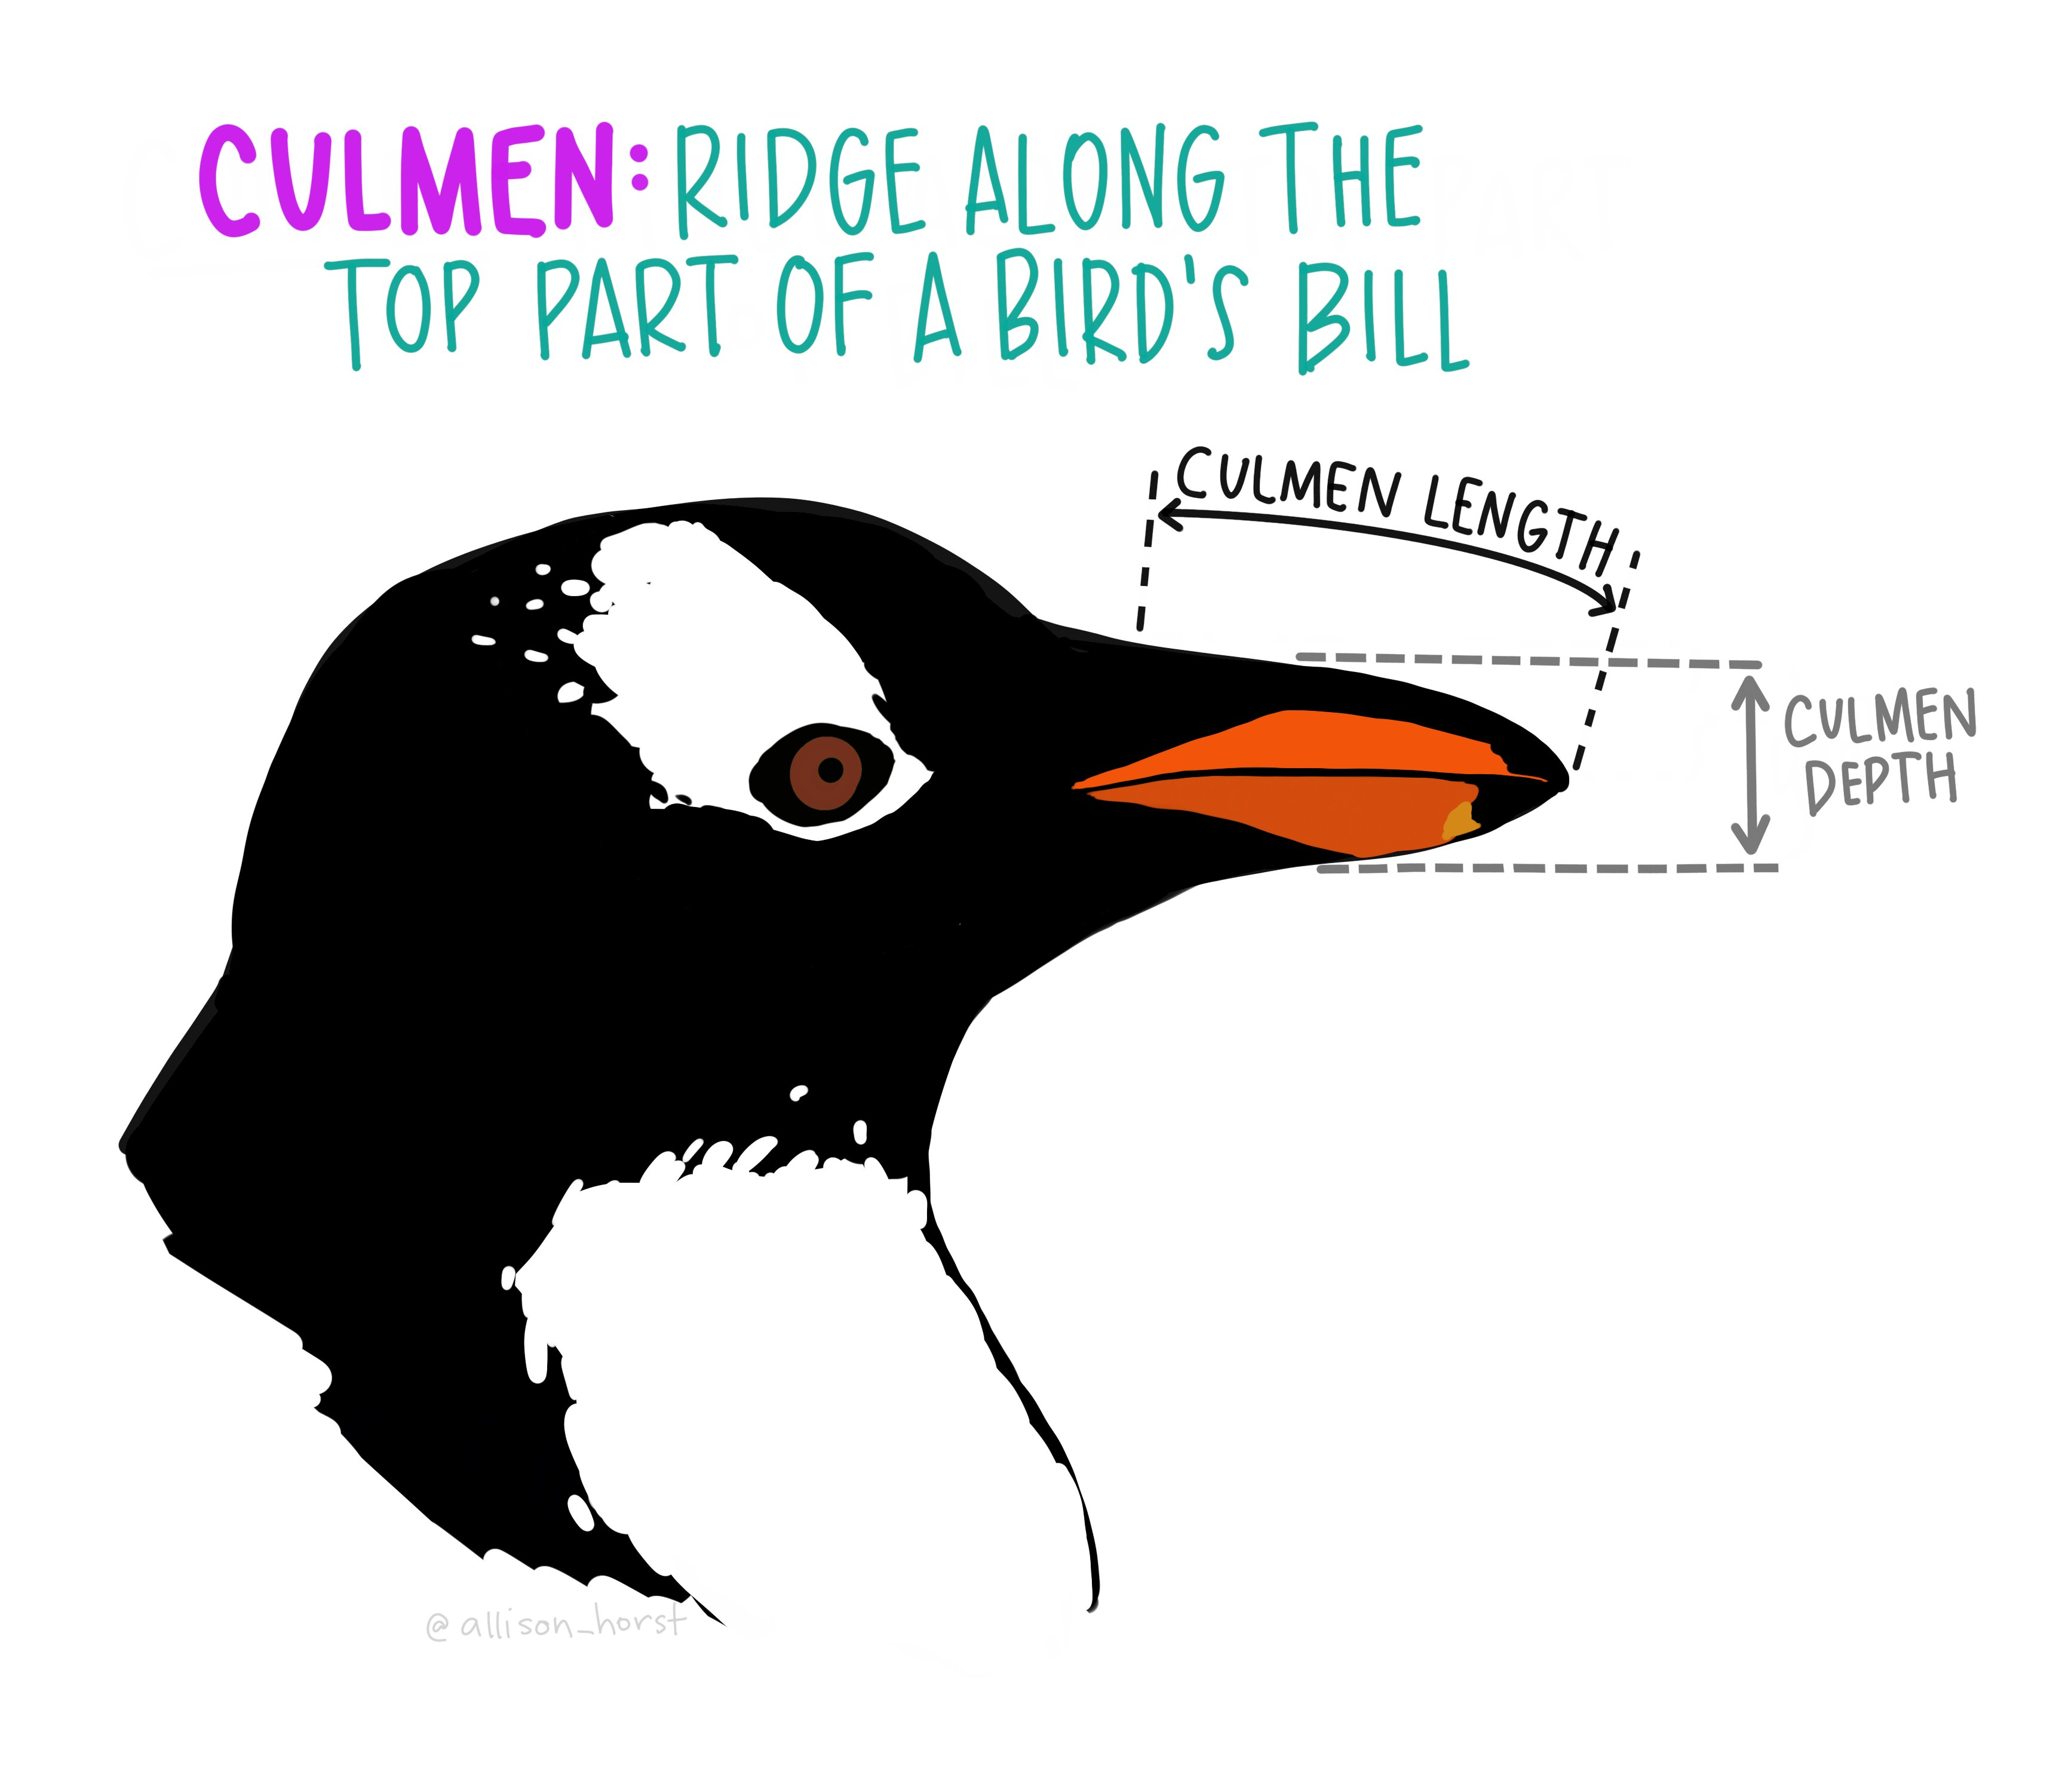
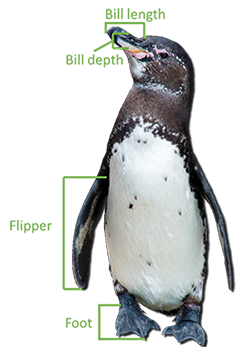

### Gráfico de dispersão (scatter plot)

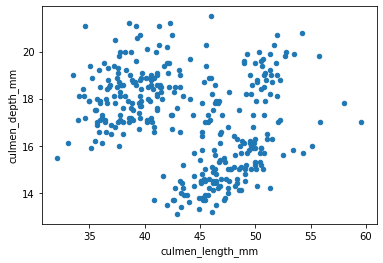

In [18]:
## Gráfico de dispersão das medidas do bico do Pinguim
df_size.plot(x='culmen_length_mm', y='culmen_depth_mm', kind='scatter');

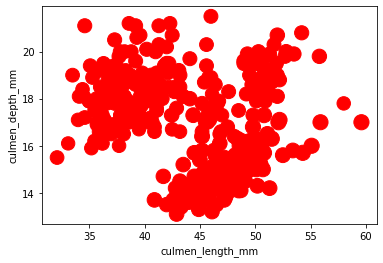

In [15]:
## Gráfico de dispersão das medidas do bico do Pinguim, com tamanho variando pelo tamanho do tronco
ax = df_size.plot(x='culmen_length_mm', y='culmen_depth_mm', kind='scatter', s = 'flipper_length_mm', c = 'red')
ax.set_label()

#### Unindo dois gráficos

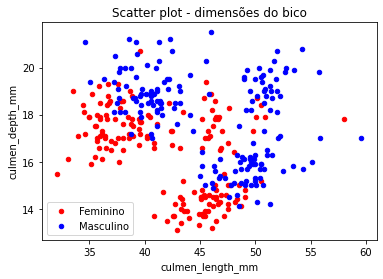

In [6]:
## se mexer apenas no xlabel e ylabel do primeiro grafico, ele mantém os labels do segundo (padrão)
ax1 = df_size[df_size.sex == 'FEMALE'].plot(x='culmen_length_mm', y='culmen_depth_mm', kind='scatter', c = 'red', label = 'Feminino', 
                                  xlabel = 'tamanho do bico', ylabel='altura do bico',
                                  title='Scatter plot - dimensões do bico')
ax2 = df_size[df_size.sex == 'MALE'].plot(x='culmen_length_mm', y='culmen_depth_mm', kind='scatter', c = 'blue', label = 'Masculino', ax=ax1)

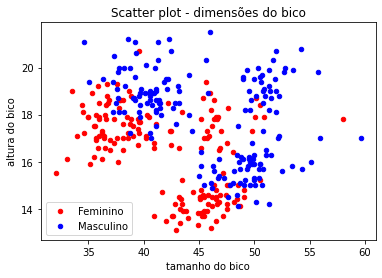

In [14]:
## se mexer apenas no xlabel e ylabel do segundo gráfico, ele altera para o label do segundo
ax1 = df_size[df_size.sex == 'FEMALE'].plot(x='culmen_length_mm', y='culmen_depth_mm', kind='scatter', c = 'red', label = 'Feminino', 
                                  title='Scatter plot - dimensões do bico')
ax2 = df_size[df_size.sex == 'MALE'].plot(x='culmen_length_mm', y='culmen_depth_mm', kind='scatter', c = 'blue', label = 'Masculino', 
                                xlabel = 'tamanho do bico', ylabel='altura do bico', ax=ax1)

#### Ajustando os labels

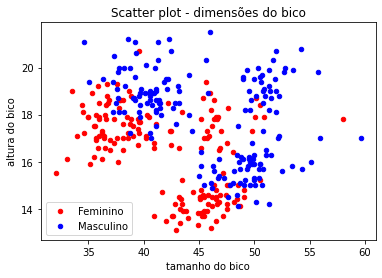

In [17]:
## Uma forma de evitar isso, é utilizar as funções set_xlabel e set_ylabel para determinar labels e títulos no final de tudo

ax1 = df_size[df_size.sex == 'FEMALE'].plot(x='culmen_length_mm', y='culmen_depth_mm', kind='scatter', c = 'red', label = 'Feminino', 
                                  title='Scatter plot - dimensões do bico')
ax2 = df_size[df_size.sex == 'MALE'].plot(x='culmen_length_mm', y='culmen_depth_mm', kind='scatter', c = 'blue', label = 'Masculino', 
                                ax=ax1)

ax1.set_xlabel('tamanho do bico')
ax1.set_ylabel('altura do bico');

## plt.show evita imprimir textos "desnecessários" das funções
# plt.show()

#### Tamanho do gráfico

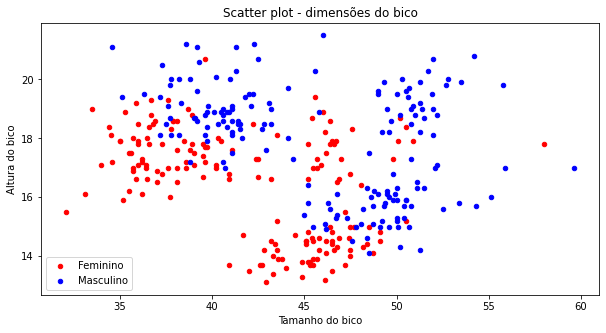

In [27]:
## Mexer no tamanho dos gráficos

ax1 = df_size[df_size.sex == 'FEMALE'].plot(x='culmen_length_mm', y='culmen_depth_mm', kind='scatter', c = 'red', label = 'Feminino', 
                                  title='Scatter plot - dimensões do bico')
ax2 = df_size[df_size.sex == 'MALE'].plot(x='culmen_length_mm', y='culmen_depth_mm', kind='scatter', c = 'blue', label = 'Masculino', 
                                ax=ax1, figsize=(10,5))


ax1.set_xlabel('Tamanho do bico')
ax1.set_ylabel('Altura do bico')
ax1.legend(loc='lower left')

## plt.show evita imprimir textos "desnecessários" das funções
plt.show()

## Gráfico de linhas

In [28]:
df_vendas = pd.DataFrame({'Mês' : ['Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr'],
                         'Quantidade' : np.random.randint(low=100, size=12),
                          'Veículo' : np.repeat(['HB20', 'Onix', 'Sandero'],4)})

In [30]:
df_vendas

,Mês,Quantidade,Veículo
0,Jan,69,HB20
1,Fev,67,HB20
2,Mar,91,HB20
3,Abr,43,HB20
4,Jan,48,Onix
5,Fev,16,Onix
6,Mar,99,Onix
7,Abr,15,Onix
8,Jan,59,Sandero
9,Fev,81,Sandero


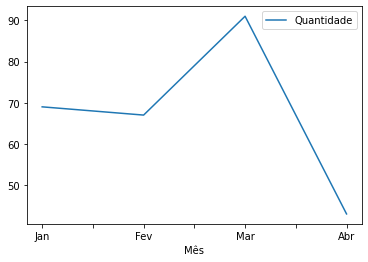

In [34]:
df_vendas[df_vendas['Veículo'] == 'HB20'].plot(x='Mês', y='Quantidade');

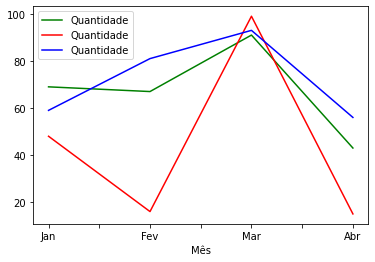

In [35]:
ax1 = df_vendas[df_vendas['Veículo'] == 'HB20'].plot(x='Mês', y='Quantidade', c='green')
ax2 = df_vendas[df_vendas['Veículo'] == 'Onix'].plot(x='Mês', y='Quantidade', c='red', ax=ax1)
ax3 = df_vendas[df_vendas['Veículo'] == 'Sandero'].plot(x='Mês', y='Quantidade', c='blue', ax=ax1)

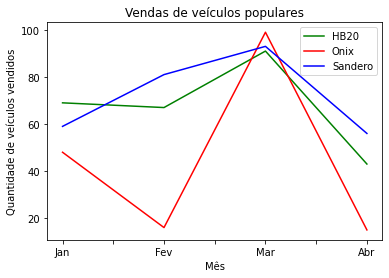

In [40]:
ax1 = df_vendas[df_vendas['Veículo'] == 'HB20'].plot(x='Mês', y='Quantidade', c='green', label = 'HB20', title= 'Vendas de veículos populares')
ax2 = df_vendas[df_vendas['Veículo'] == 'Onix'].plot(x='Mês', y='Quantidade', c='red', ax=ax1, label = 'Onix')
ax3 = df_vendas[df_vendas['Veículo'] == 'Sandero'].plot(x='Mês', y='Quantidade', c='blue', ax=ax1, label = 'Sandero')

ax1.set_ylabel('Quantidade de veículos vendidos');

In [41]:
df_vendas.pivot(index='Mês', columns='Veículo', values='Quantidade')

Veículo,HB20,Onix,Sandero
Mês,,,
Abr,43,15,56
Fev,67,16,81
Jan,69,48,59
Mar,91,99,93


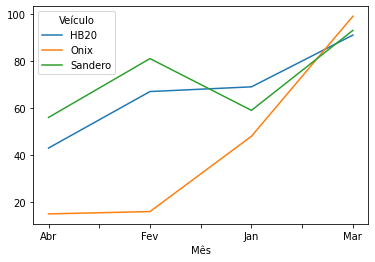

In [43]:
df_vendas.pivot(index='Mês', columns='Veículo', values='Quantidade').plot(kind='line');

In [44]:
df_vendas['Mês'] = pd.Categorical(df_vendas['Mês'], categories=["Jan", "Fev", "Mar", "Abr"], ordered=True)

In [46]:
df_vendas.pivot(index='Mês', columns='Veículo', values='Quantidade')

Veículo,HB20,Onix,Sandero
Mês,,,
Jan,69,48,59
Fev,67,16,81
Mar,91,99,93
Abr,43,15,56


In [51]:
df_vendas.pivot_table(index='Mês', columns='Veículo', values='Quantidade')

Veículo,HB20,Onix,Sandero
Mês,,,
Jan,69,48,59
Fev,67,16,81
Mar,91,99,93
Abr,43,15,56


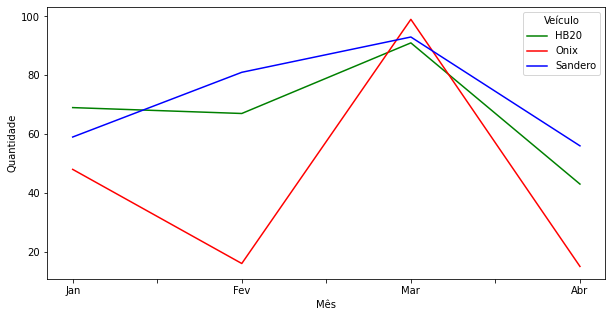

In [50]:
df_vendas.pivot(index='Mês', columns='Veículo', values='Quantidade').plot(kind='line', ylabel='Quantidade', figsize=(10,5), color={'Onix': 'red', 'Sandero': 'blue', 'HB20': 'green'});

## Gráfico de pizza

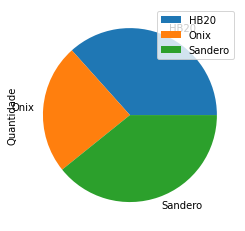

In [53]:
df_vendas.groupby(['Veículo']).sum().plot(y='Quantidade', kind='pie');

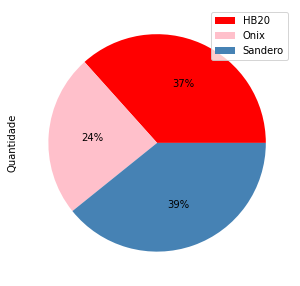

In [63]:
df_vendas.groupby(['Veículo']).sum().plot(y='Quantidade', kind='pie', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'], labeldistance=None , figsize=(10,5));

In [67]:
df_vendas.pivot_table(index='Mês', values='Quantidade', aggfunc='sum')

,Quantidade
Mês,
Jan,176
Fev,164
Mar,283
Abr,114


<AxesSubplot:ylabel='Quantidade'>

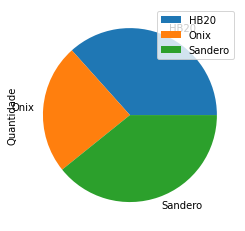

In [70]:
df_vendas.pivot_table(index='Veículo', values='Quantidade', aggfunc='sum').plot(y='Quantidade', kind='pie')

In [64]:
df_vendas.pivot(index='Mês', columns='Veículo', values='Quantidade')

Veículo,HB20,Onix,Sandero
Mês,,,
Jan,69,48,59
Fev,67,16,81
Mar,91,99,93
Abr,43,15,56


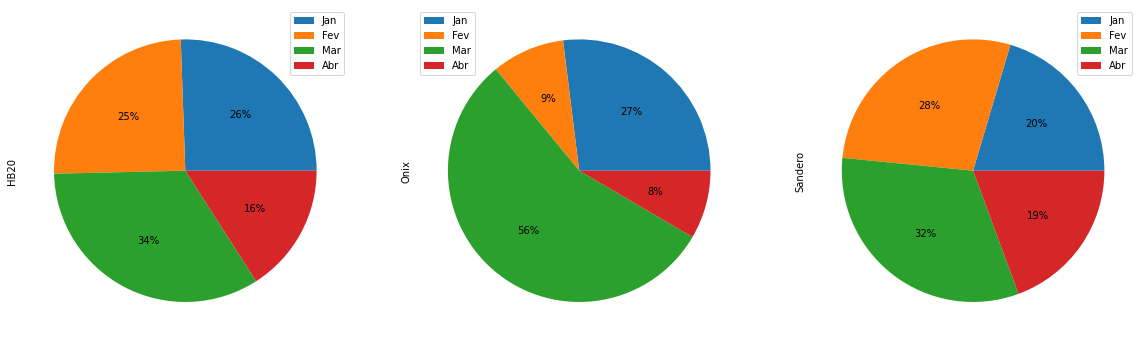

In [71]:
df_vendas.pivot(index='Mês', columns='Veículo', values='Quantidade').plot(subplots=True, kind='pie', figsize=(20,10), 
                                                                      autopct='%1.0f%%', labeldistance=None)
plt.show()

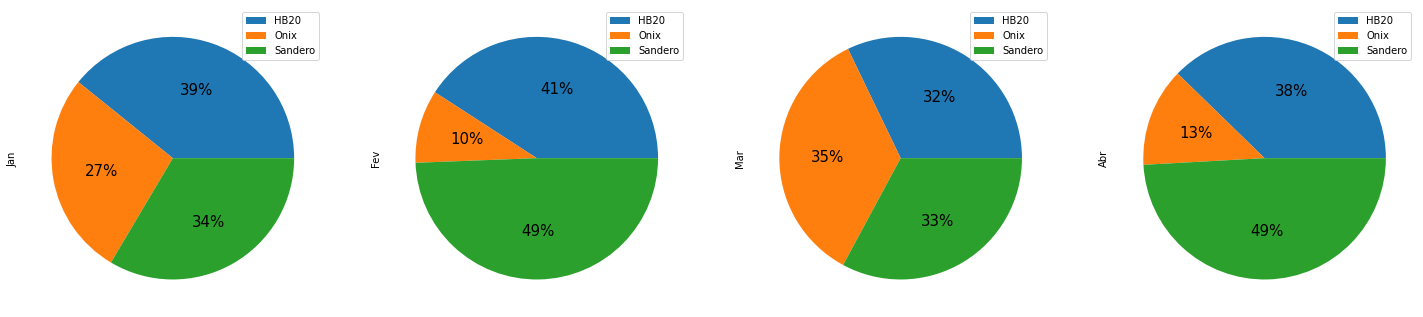

In [80]:
df_vendas.pivot(index='Veículo', columns='Mês', values='Quantidade').plot(subplots=True, kind='pie', figsize=(25,20), 
                                                                      autopct='%1.0f%%', fontsize=15, labeldistance=None)
plt.show()

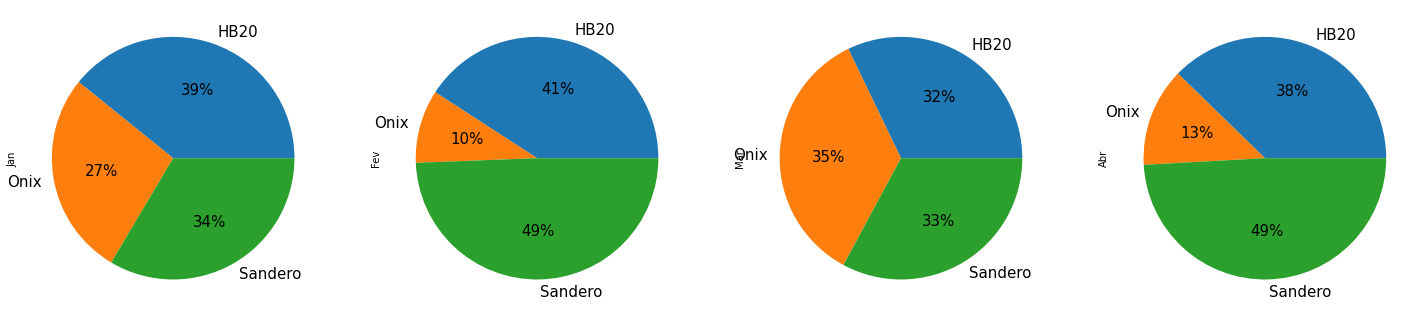

In [79]:
df_vendas.pivot(index='Veículo', columns='Mês', values='Quantidade').plot(subplots=True, kind='pie', figsize=(25,20), 
                                                                      autopct='%1.0f%%', fontsize=15, legend=None)
plt.show()

## Gráfico de barras

<AxesSubplot:xlabel='Veículo'>

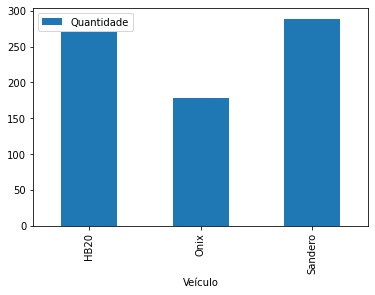

In [81]:
df_vendas.groupby('Veículo').sum().plot(kind='bar')

In [87]:
df_vendas.groupby('Mês').sum()

,Quantidade
Mês,
Jan,176
Fev,164
Mar,283
Abr,114


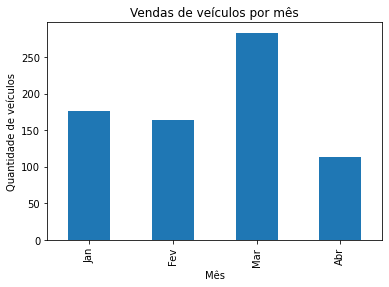

In [86]:
df_vendas.groupby('Mês').sum().plot(kind='bar', title='Vendas de veículos por mês', legend=None, ylabel='Quantidade de veículos');

#### Subplots

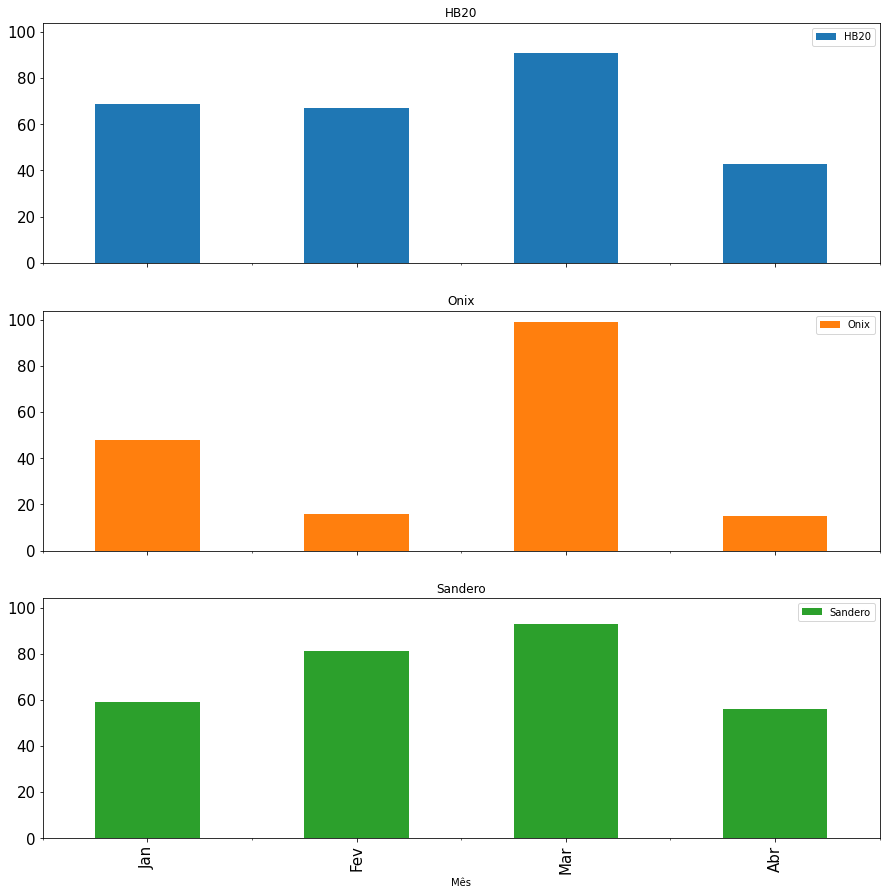

In [98]:
## o index sempre é o que vai no eixo X, e o values é o que vai no eixo Y. Columns irá separar em vários gráficos
## Se subplot=True, e se False, irá criar barras coloridas lado a lado mostrando esses 
ax_bar = df_vendas.pivot(index='Mês', columns='Veículo', values='Quantidade').plot(subplots=True, kind='bar', figsize=(15,15), 
                                                                      fontsize=15, sharey=True)
plt.show()

#### Multiplotagem

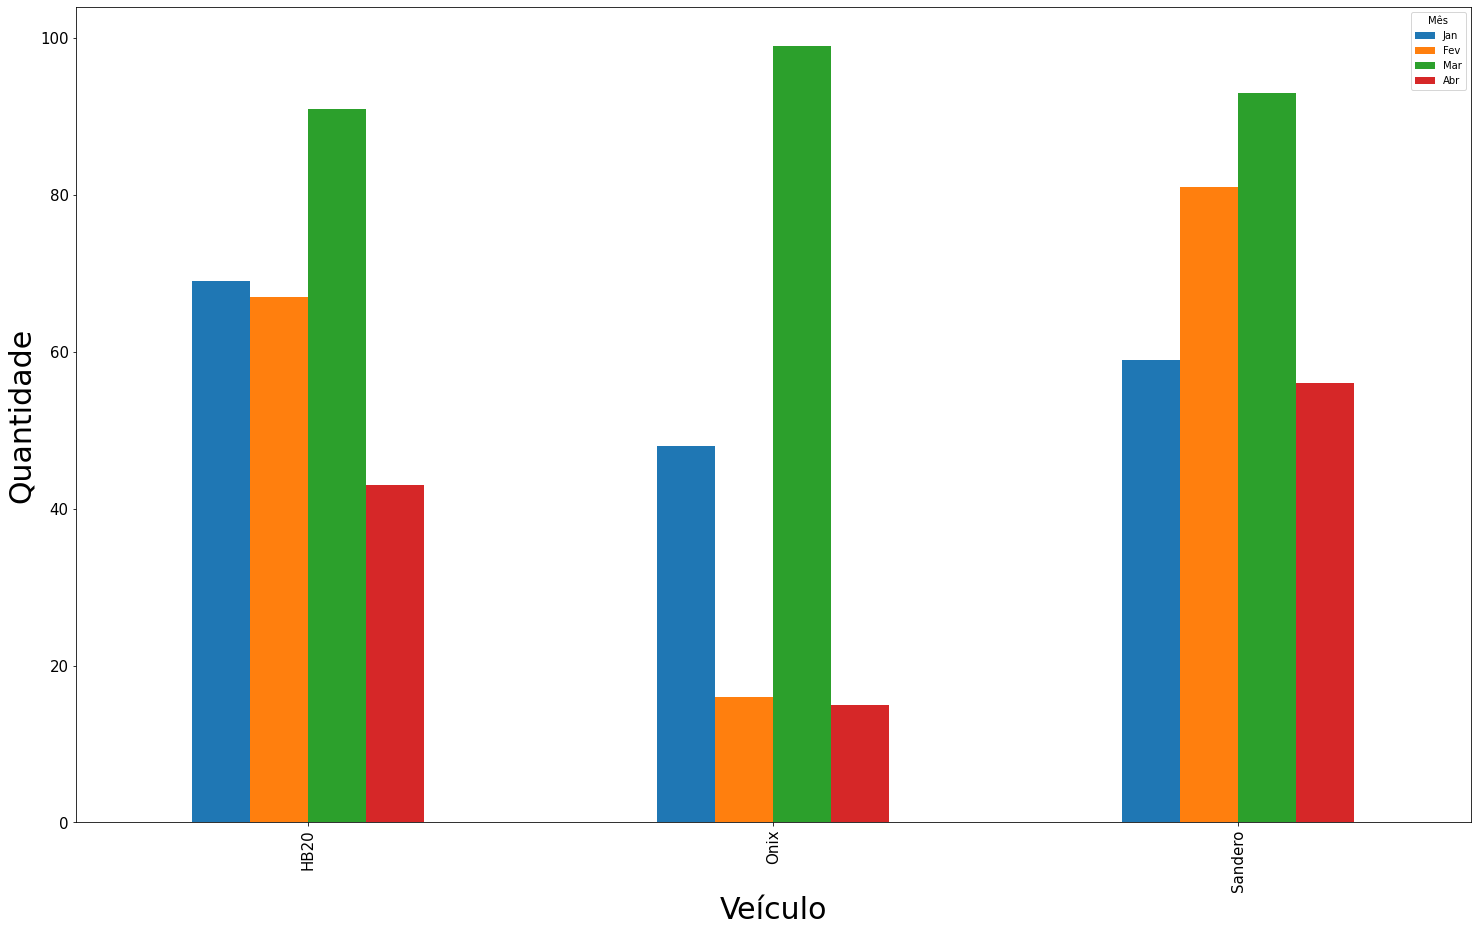

In [100]:
ax_bar = df_vendas.pivot(index='Veículo', columns='Mês', values='Quantidade').plot(kind='bar', figsize=(25,15), 
                                                                      fontsize=15)

ax_bar.set_ylabel('Quantidade', fontsize=30)
ax_bar.set_xlabel('Veículo', fontsize=30)

plt.show()

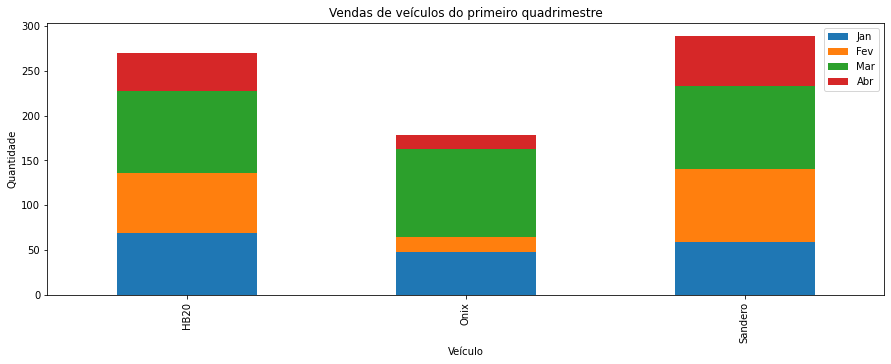

In [115]:
ax_bar = df_vendas.pivot(index='Veículo', columns='Mês', values='Quantidade').plot(kind='bar', figsize=(15,5), 
                                                                      stacked=True, title = 'Vendas de veículos do primeiro quadrimestre')

ax_bar.set_ylabel('Quantidade', fontsize=10)
ax_bar.set_xlabel('Veículo')
ax_bar.legend(loc='upper right', fontsize=10)

plt.show()

#### Barras Horizontais

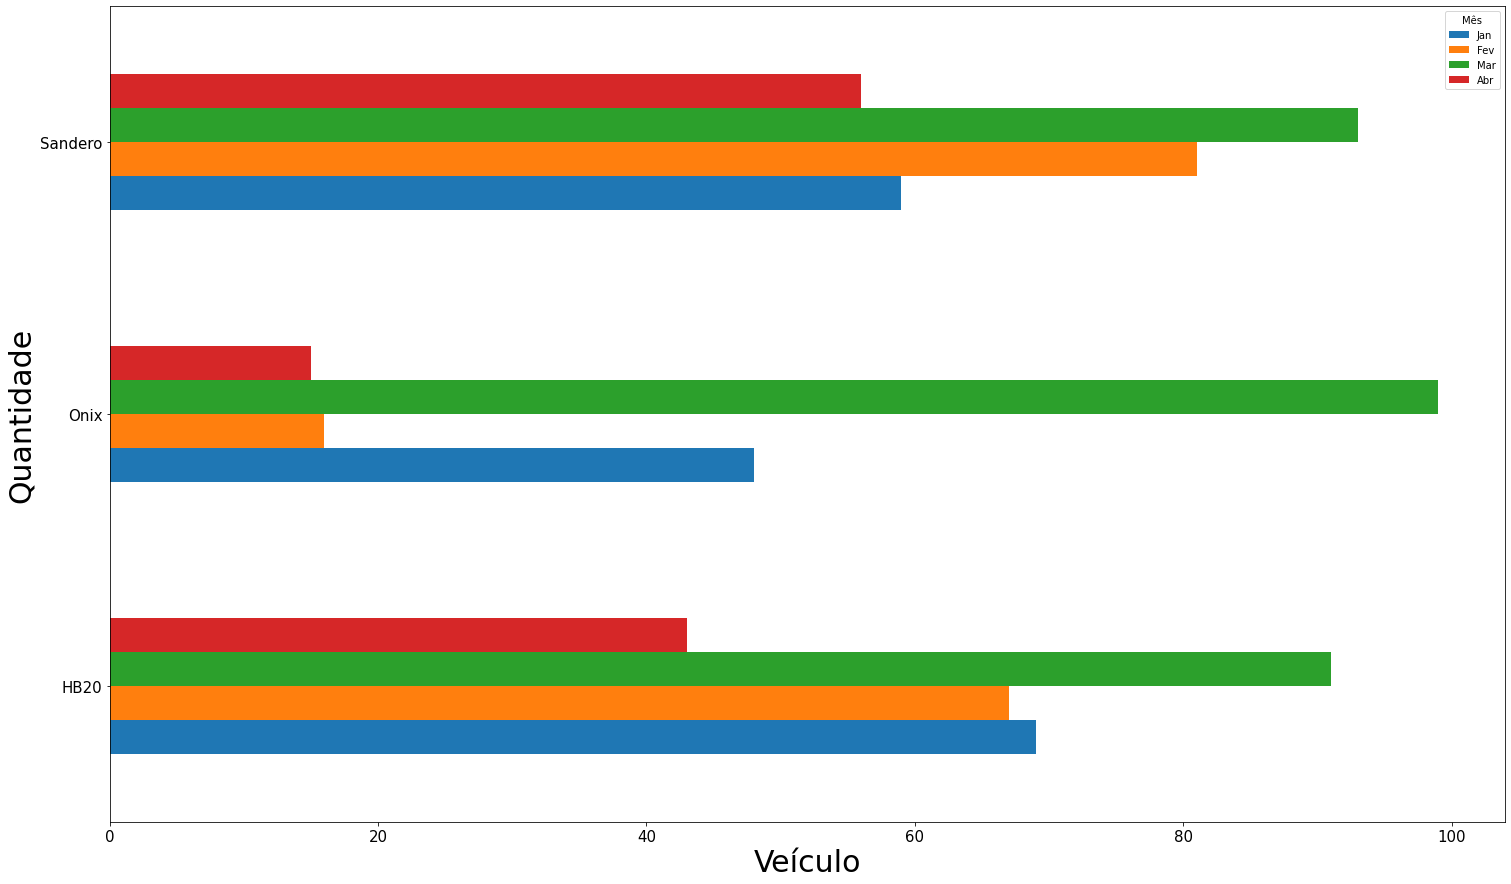

In [116]:
ax_bar = df_vendas.pivot(index='Veículo', columns='Mês', values='Quantidade').plot(kind='barh', figsize=(25,15), 
                                                                      fontsize=15)

ax_bar.set_ylabel('Quantidade', fontsize=30)
ax_bar.set_xlabel('Veículo', fontsize=30)

plt.show()